# Titanic predecting ML

# important library needed

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from category_encoders import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score
from sklearn.utils.validation import check_is_fitted
from pprint import PrettyPrinter 
from sklearn.model_selection import train_test_split

In [3]:
pp = PrettyPrinter(indent=2)

# explore data

In [4]:
#reading data
train_data = pd.read_csv(r"C:\Users\Mega Store\Downloads\titanic.csv")
train_data.head(10)

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,0
5,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,1
6,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,1
7,1,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,0
8,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,1
9,1,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,0


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   name      1309 non-null   object 
 2   sex       1309 non-null   object 
 3   age       1046 non-null   float64
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
 6   ticket    1309 non-null   object 
 7   fare      1308 non-null   float64
 8   cabin     295 non-null    object 
 9   embarked  1307 non-null   object 
 10  survived  1309 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


# some visaulization of features

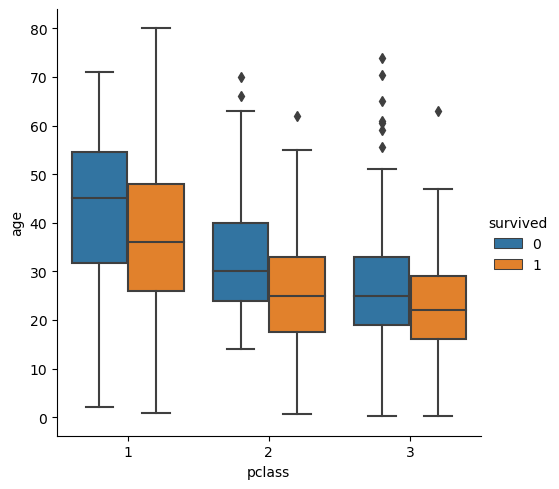

In [6]:
sns.catplot(y = 'age', x='pclass', hue='survived',kind='box', data=train_data)

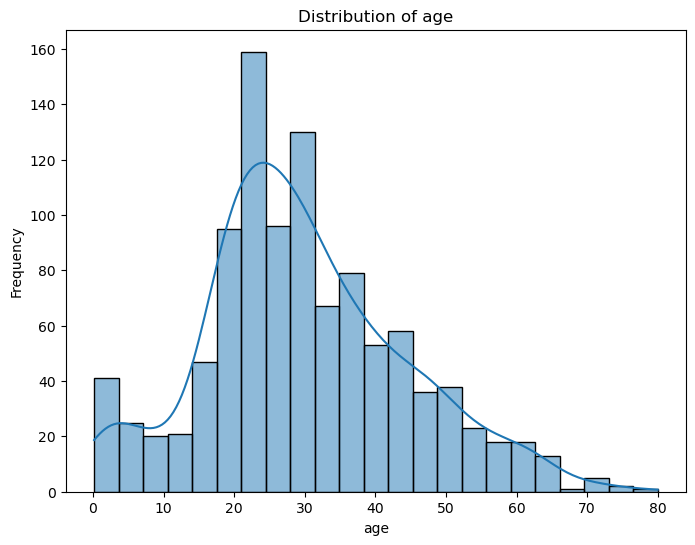

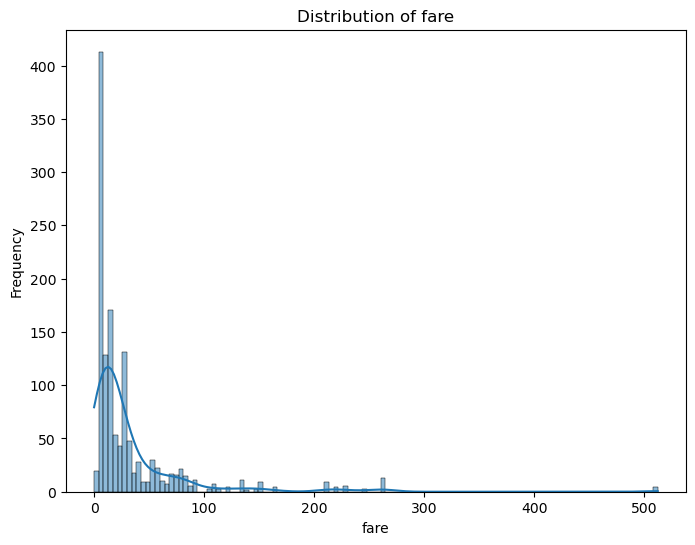

In [7]:
# Plot the distribution of each numerical feature
numerical_features = ['age', 'fare']  
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=train_data, x=feature, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

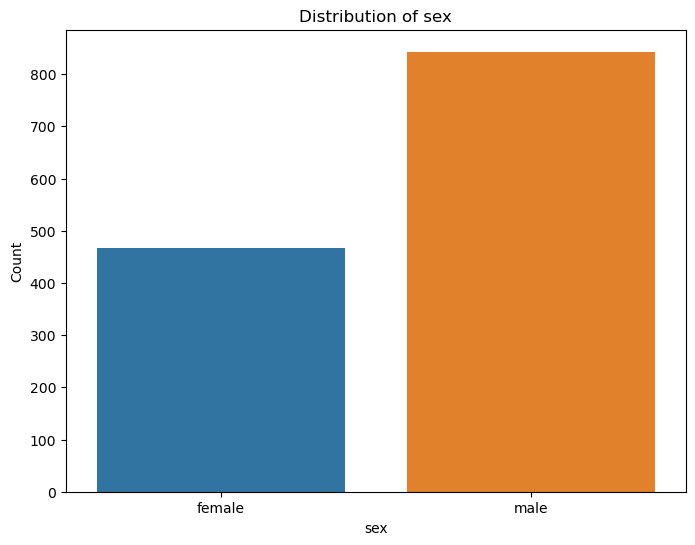

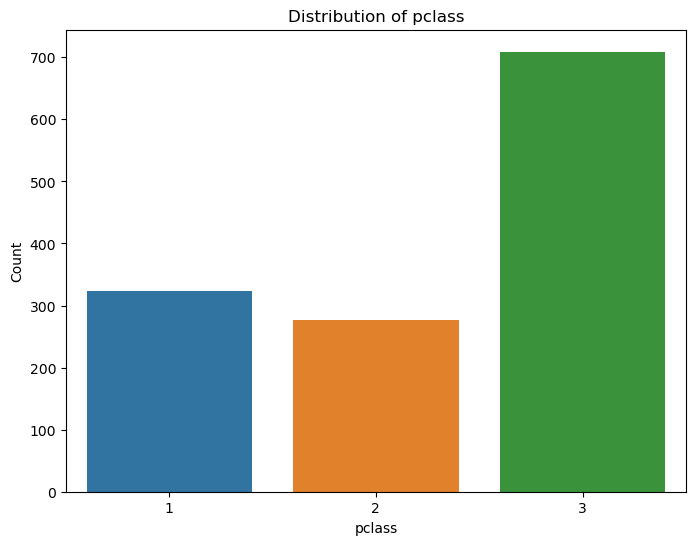

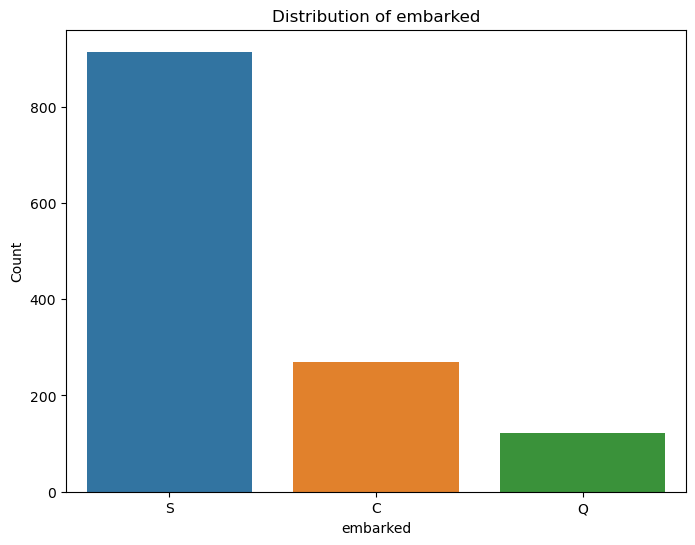

In [8]:
# Plot the distribution of each categorical feature
categorical_features = ['sex', 'pclass', 'embarked']  
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=train_data, x=feature)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

In [11]:
# get corrolation between features
corr = train_data.drop(columns=["survived","name","cabin"]).corr()
corr

,pclass,age,sibsp,parch,fare
pclass,1.000000,-0.408106,0.060832,0.018322,-0.558629
age,-0.408106,1.000000,-0.243699,-0.150917,0.178739
sibsp,0.060832,-0.243699,1.000000,0.373587,0.160238
parch,0.018322,-0.150917,0.373587,1.000000,0.221539
fare,-0.558629,0.178739,0.160238,0.221539,1.000000


# spliting data

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    train_data.drop(columns=["survived","name","cabin"]),train_data["survived"]
    , test_size=0.20, random_state=42)

# KNN model 

In [16]:
# Evaluate KNN with different k values and distance metrics
metrics = ['euclidean', 'manhattan','minkowski']
for metric in metrics:

    for k in [2,3,5,9] : 

        KNN_model = make_pipeline(
            OneHotEncoder(),
            SimpleImputer(),
            KNeighborsClassifier(n_neighbors=k,metric=metric)
        )
        KNN_model.fit(X_train , y_train)
        # Check your work
        check_is_fitted(KNN_model[-1])
        #test model
        ytrain_pred = KNN_model.predict(X_test)
        #evoulate model
        print(f'Distance Metric: {metric}')
        print("when k =",k)
        print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, ytrain_pred)))
        print('Model precision score: {0:0.4f}'. format(precision_score(y_test, ytrain_pred)))
        print('Model recall score: {0:0.4f}'. format(recall_score(y_test, ytrain_pred)))
        print('Model F1 score: {0:0.4f}'. format(f1_score(y_test, ytrain_pred)))
        print("----------------------------------------------------------------------------------------------")

C:\Users\Mega Store\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Mega Store\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Se

Distance Metric: euclidean
when k = 2
Model accuracy score: 0.6374
Model precision score: 0.7091
Model recall score: 0.3305
Model F1 score: 0.4509
----------------------------------------------------------------------------------------------
Distance Metric: euclidean
when k = 3
Model accuracy score: 0.6527
Model precision score: 0.6517
Model recall score: 0.4915
Model F1 score: 0.5604
----------------------------------------------------------------------------------------------


C:\Users\Mega Store\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Mega Store\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Se

Distance Metric: euclidean
when k = 5
Model accuracy score: 0.6794
Model precision score: 0.7024
Model recall score: 0.5000
Model F1 score: 0.5842
----------------------------------------------------------------------------------------------
Distance Metric: euclidean
when k = 9
Model accuracy score: 0.6832
Model precision score: 0.7333
Model recall score: 0.4661
Model F1 score: 0.5699
----------------------------------------------------------------------------------------------


C:\Users\Mega Store\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Distance Metric: manhattan
when k = 2
Model accuracy score: 0.6679
Model precision score: 0.7925
Model recall score: 0.3559
Model F1 score: 0.4912
----------------------------------------------------------------------------------------------


C:\Users\Mega Store\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Distance Metric: manhattan
when k = 3
Model accuracy score: 0.6908
Model precision score: 0.7126
Model recall score: 0.5254
Model F1 score: 0.6049
----------------------------------------------------------------------------------------------


C:\Users\Mega Store\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Distance Metric: manhattan
when k = 5
Model accuracy score: 0.6947
Model precision score: 0.7159
Model recall score: 0.5339
Model F1 score: 0.6117
----------------------------------------------------------------------------------------------


C:\Users\Mega Store\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Mega Store\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Se

Distance Metric: manhattan
when k = 9
Model accuracy score: 0.7290
Model precision score: 0.7831
Model recall score: 0.5508
Model F1 score: 0.6468
----------------------------------------------------------------------------------------------
Distance Metric: minkowski
when k = 2
Model accuracy score: 0.6374
Model precision score: 0.7091
Model recall score: 0.3305
Model F1 score: 0.4509
----------------------------------------------------------------------------------------------


C:\Users\Mega Store\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Distance Metric: minkowski
when k = 3
Model accuracy score: 0.6527
Model precision score: 0.6517
Model recall score: 0.4915
Model F1 score: 0.5604
----------------------------------------------------------------------------------------------
Distance Metric: minkowski
when k = 5
Model accuracy score: 0.6794
Model precision score: 0.7024
Model recall score: 0.5000
Model F1 score: 0.5842
----------------------------------------------------------------------------------------------
Distance Metric: minkowski
when k = 9
Model accuracy score: 0.6832
Model precision score: 0.7333
Model recall score: 0.4661
Model F1 score: 0.5699
----------------------------------------------------------------------------------------------


C:\Users\Mega Store\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Mega Store\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Se

# best KNN model

In [18]:
KNN =make_pipeline(
    OneHotEncoder(),
    SimpleImputer(),
    KNeighborsClassifier(n_neighbors=9,metric="manhattan")
)
KNN.fit(X_train,y_train)
check_is_fitted(KNN[-1])
#test model
fytrain_pred = KNN.predict(X_test)
#evoulate model
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, fytrain_pred)))
print('Model precision score: {0:0.4f}'. format(precision_score(y_test, fytrain_pred)))
print('Model recall score: {0:0.4f}'. format(recall_score(y_test, fytrain_pred)))
print('Model F1 score: {0:0.4f}'. format(f1_score(y_test, fytrain_pred)))
print("----------------------------------------------------------------------------------------------")

Model accuracy score: 0.7290
Model precision score: 0.7831
Model recall score: 0.5508
Model F1 score: 0.6468
----------------------------------------------------------------------------------------------


C:\Users\Mega Store\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


# predecting KNN model

In [19]:
#read test data
test_data = pd.read_csv(r"C:\Users\Mega Store\Downloads\test (1).csv")
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    19 non-null     int64  
 1   name      19 non-null     object 
 2   sex       19 non-null     object 
 3   age       18 non-null     float64
 4   sibSp     19 non-null     int64  
 5   parch     19 non-null     int64  
 6   ticket    19 non-null     object 
 7   fare      19 non-null     float64
 8   cabin     2 non-null      object 
 9   embarked  19 non-null     object 
dtypes: float64(2), int64(3), object(5)
memory usage: 1.6+ KB


In [24]:
# spliting data
X_test1= test_data.drop(columns=["name","cabin"])

In [25]:
#predecting model
y_pred_test = pd.Series(KNN.predict(X_test1))

C:\Users\Mega Store\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- sibSp
Feature names seen at fit time, yet now missing:
- sibsp

  warnings.warn(message, FutureWarning)
C:\Users\Mega Store\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [26]:
y_pred_test.sum()

5

# Naive Bayes model

In [27]:
# Evaluate NB
NB_model = make_pipeline(
    OneHotEncoder(),
    SimpleImputer(),
    GaussianNB()
)
NB_model.fit(X_train , y_train)
# Check your work
check_is_fitted(NB_model[-1])
#test model
ytrain_pred0 = NB_model.predict(X_test)
#evoulate model
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, ytrain_pred0)))
print('Model precision score: {0:0.4f}'. format(precision_score(y_test, ytrain_pred0)))
print('Model recall score: {0:0.4f}'. format(recall_score(y_test, ytrain_pred0)))
print('Model F1 score: {0:0.4f}'. format(f1_score(y_test, ytrain_pred0)))
print("----------------------------------------------------------------------------------------------")

Model accuracy score: 0.4962
Model precision score: 0.4682
Model recall score: 0.8729
Model F1 score: 0.6095
----------------------------------------------------------------------------------------------


# perdict NB model

In [28]:
y_pred_test0 = pd.Series(NB_model.predict(X_test1))
y_pred_test0.sum()

C:\Users\Mega Store\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- sibSp
Feature names seen at fit time, yet now missing:
- sibsp

  warnings.warn(message, FutureWarning)


8

# SVM model

In [29]:
# Experiment with different kernel functions and regularization parameters
kernels = ['linear', 'poly', 'rbf']
C_values = [0.1, 1]
gamma_values = [0.1, 1]
for kernel in kernels:
    for C in C_values:
        for gamma in gamma_values:
            
            SVM_model = make_pipeline(
                OneHotEncoder(),
                SimpleImputer(),
                svm.SVC(kernel=kernel, C=C, gamma=gamma)
            )
            SVM_model.fit(X_train , y_train)
            # Check your work
            check_is_fitted(SVM_model[-1])
            #test model
            ytrain_pred1 = SVM_model.predict(X_test)
            #evoulate model
            print("kernel : " , kernel)
            print("C & gamma values :" , C , gamma )
            print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, ytrain_pred1)))
            print('Model precision score: {0:0.4f}'. format(precision_score(y_test, ytrain_pred1)))
            print('Model recall score: {0:0.4f}'. format(recall_score(y_test, ytrain_pred1)))
            print('Model F1 score: {0:0.4f}'. format(f1_score(y_test, ytrain_pred1)))
            print("----------------------------------------------------------------------------------------------")

kernel :  linear
C & gamma values : 0.1 0.1
Model accuracy score: 0.7595
Model precision score: 0.7895
Model recall score: 0.6356
Model F1 score: 0.7042
----------------------------------------------------------------------------------------------
kernel :  linear
C & gamma values : 0.1 1
Model accuracy score: 0.7595
Model precision score: 0.7895
Model recall score: 0.6356
Model F1 score: 0.7042
----------------------------------------------------------------------------------------------
kernel :  linear
C & gamma values : 1 0.1
Model accuracy score: 0.7901
Model precision score: 0.8316
Model recall score: 0.6695
Model F1 score: 0.7418
----------------------------------------------------------------------------------------------
kernel :  linear
C & gamma values : 1 1
Model accuracy score: 0.7901
Model precision score: 0.8316
Model recall score: 0.6695
Model F1 score: 0.7418
----------------------------------------------------------------------------------------------
kernel :  poly
C

C:\Users\Mega Store\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


kernel :  rbf
C & gamma values : 0.1 1
Model accuracy score: 0.5496
Model precision score: 0.0000
Model recall score: 0.0000
Model F1 score: 0.0000
----------------------------------------------------------------------------------------------


C:\Users\Mega Store\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


kernel :  rbf
C & gamma values : 1 0.1
Model accuracy score: 0.6756
Model precision score: 0.7324
Model recall score: 0.4407
Model F1 score: 0.5503
----------------------------------------------------------------------------------------------
kernel :  rbf
C & gamma values : 1 1
Model accuracy score: 0.6031
Model precision score: 0.8500
Model recall score: 0.1441
Model F1 score: 0.2464
----------------------------------------------------------------------------------------------


# GridSearch

In [30]:
#Tune hyperparameters using GridSearchCV
param_grid = {'svc__kernel': ['rbf','poly','linear'], 'svc__C': [1,0.1], 'svc__gamma': [1,0.1]}
grid_search = GridSearchCV(SVM_model, param_grid, cv=3)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('onehotencoder',
                                        OneHotEncoder(cols=['sex', 'ticket',
                                                            'embarked'])),
                                       ('simpleimputer', SimpleImputer()),
                                       ('svc', SVC(C=1, gamma=1))]),
             param_grid={'svc__C': [1, 0.1], 'svc__gamma': [1, 0.1],
                         'svc__kernel': ['rbf', 'poly', 'linear']})

In [31]:
grid_search.best_score_

0.8070678127984717

In [32]:
pp.pprint(pd.DataFrame(grid_search.cv_results_))

    mean_fit_time  std_fit_time  mean_score_time  std_score_time param_svc__C  \
0        0.171258      0.006140         0.115838        0.000508            1   
1        6.290456      1.813415         0.046025        0.003131            1   
2        2.425533      0.694944         0.047471        0.009200            1   
3        0.198192      0.017997         0.131653        0.016729            1   
4        7.020355      2.765090         0.040332        0.003439            1   
5        2.521261      0.843160         0.042209        0.000784            1   
6        0.186482      0.012627         0.159650        0.021031          0.1   
7        6.253212      1.787021         0.045664        0.008324          0.1   
8        1.095248      0.181570         0.044415        0.004106          0.1   
9        0.159099      0.004639         0.110837        0.006815          0.1   
10       7.530584      3.030662         0.050449        0.008134          0.1   
11       1.251368      0.231

In [33]:
# Get the best hyperparameters
best_params = grid_search.best_params_
best_kernel = best_params['svc__kernel']
best_C = best_params['svc__C']
best_gamma = best_params['svc__gamma']
print(best_C,best_gamma,best_kernel)

1 1 linear


# Best SVM model

In [34]:
b_SVM = make_pipeline(
    OneHotEncoder(),
    SimpleImputer(),
    svm.SVC(kernel='linear', C=1 ,gamma=1)
)
b_SVM.fit(X_train , y_train)
# Check your work
check_is_fitted(b_SVM[-1])
#test model
ytrain_pred1 = b_SVM.predict(X_test)
#evoulate model
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, ytrain_pred1)))
print('Model precision score: {0:0.4f}'. format(precision_score(y_test, ytrain_pred1)))
print('Model recall score: {0:0.4f}'. format(recall_score(y_test, ytrain_pred1)))
print('Model F1 score: {0:0.4f}'. format(f1_score(y_test, ytrain_pred1)))
print("----------------------------------------------------------------------------------------------")

Model accuracy score: 0.7901
Model precision score: 0.8316
Model recall score: 0.6695
Model F1 score: 0.7418
----------------------------------------------------------------------------------------------


# predict SVM model

In [37]:
y_pred_test1 = pd.Series(b_SVM.predict(X_test1))
y_pred_test1.sum()

C:\Users\Mega Store\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- sibSp
Feature names seen at fit time, yet now missing:
- sibsp

  warnings.warn(message, FutureWarning)


8

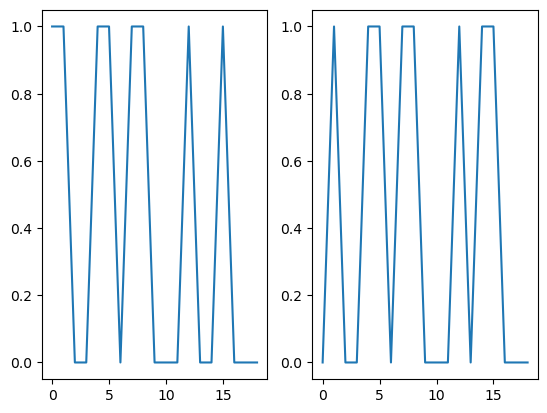

In [43]:
plt.subplot(111)
plt.plot(y_pred_test)
plt.subplot(121)
plt.plot(y_pred_test0)
plt.subplot(122)
plt.plot(y_pred_test1)
plt.show()

# conclution 

## SVM is best model for titanic data with accuracy = 0.79

### as KNN may perform well when there are clear boundaries between classes, but it can be sensitive to outliers and high-dimensional data.

### Naive Bayes is computationally efficient and works well with categorical features, but it assumes independence between features, which may not hold true in all cases.

### SVM can capture complex relationships in the data using different kernel functions, but it may require careful tuning of hyperparameters and can be sensitive to the choice of kernel & too slow to get best pramaters with grid search .